In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soccer/database.sqlite
/kaggle/input/world-development-indicators/SeriesNotes.csv
/kaggle/input/world-development-indicators/Series.csv
/kaggle/input/world-development-indicators/Indicators.csv
/kaggle/input/world-development-indicators/Footnotes.csv
/kaggle/input/world-development-indicators/database.sqlite
/kaggle/input/world-development-indicators/hashes.txt
/kaggle/input/world-development-indicators/Country.csv
/kaggle/input/world-development-indicators/CountryNotes.csv


<p style="font-family: Arial; font-size:3.75vw;color:purple; font-style:bold"><br>
matplotlib Exercise Notebook
</p><br>

# Exercise Notebook Instructions

### 1. Important: Only modify the cells which instruct you to modify them - leave "do not modify" cells alone.  

The code which tests your responses assumes you have run the startup/read-only code exactly.

### 2. Work through the notebook in order.

Some of the steps depend on previous, so you'll want to move through the notebook in order.

### 3. It is okay to use numpy libraries.

You may find some of these questions are fairly straightforward to answer using built-in numpy functions.  That's totally okay - part of the point of these exercises is to familiarize you with the commonly used numpy functions.

### 4. Seek help if stuck

If you get stuck, don't worry!  You can either review the videos/notebooks from this week, ask in the course forums, or look to the solutions for the correct answer.  BUT, be careful about looking to the solutions too quickly.  Struggling to get the right answer is an important part of the learning process.

In [20]:
# DO NOT MODIFY

# import appropriate libraries

import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd 
%matplotlib inline

In [21]:
# DO NOT MODIFY

# we will use this dataset for some portions of this exercise.
# source: https://www.kaggle.com/hugomathien/soccer

def get_data():
    cnx = sqlite3.connect('../input/soccer/database.sqlite')
    df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
    return df

df = get_data()

In [22]:
#DO NOT MODIFY

# Let's see what is in our dataset
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [23]:
df.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [24]:
df.sort_values('potential')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
132235,132236,178014,41496,2007-02-22 00:00:00,35.0,39.0,right,medium,medium,36.0,...,63.0,28.0,15.0,17.0,61.0,7.0,4.0,32.0,5.0,4.0
132234,132235,178014,41496,2007-08-30 00:00:00,35.0,39.0,right,medium,medium,36.0,...,63.0,28.0,20.0,20.0,61.0,7.0,20.0,32.0,20.0,20.0
66213,66214,192451,166963,2007-02-22 00:00:00,37.0,42.0,right,medium,low,37.0,...,52.0,28.0,23.0,22.0,53.0,3.0,22.0,32.0,22.0,22.0
66212,66213,192451,166963,2009-08-30 00:00:00,37.0,42.0,right,medium,low,37.0,...,52.0,28.0,23.0,22.0,53.0,3.0,22.0,32.0,22.0,22.0
181427,181428,190014,168342,2008-08-30 00:00:00,39.0,44.0,right,medium,medium,28.0,...,52.0,21.0,46.0,53.0,41.0,1.0,22.0,34.0,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,182588,116368,25538,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183249,183250,139865,32633,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183309,183310,141272,33823,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183361,183362,168650,25772,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df[:50]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 1: Line Plot<br><br></p>


In the cell below, modify the function to plot x vs y, where x and y 
are column names of dataframe (df) which is also entered as input to the function. The function should

- First sort the dataframe by the column 'x'
- Take the first 50 rows for plotting (discard the remaining)
- Provide a title
- Label x and y axes

In [48]:
# modify this cell

def line_plot(df, x, y):
    ### BEGIN SOLUTION
    df_extract = df.sort_values(by=[x])[:50]
    
    fig, ax = plt.subplots()
    ax.plot(df_extract[x], df_extract[y])
    ax.set_title('Title')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    ### END SOLUTION


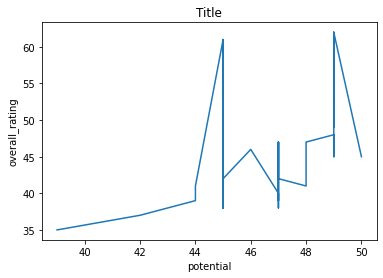

In [49]:
# DO NOT MODIFY

# your function should give a plot similar to the following:
line_plot(df, 'potential', 'overall_rating')

Your solution to Exercise 1 should look like this:
![plot1.png](attachment:plot1.png)

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 2: Histogram <br><br></p>


In the cell below, modify the function to plot a histogram. The function should take an input parameter X which is a column name of the dataframe df, also passed to the function. Be sure to drop NULL values before you plot the histogram.

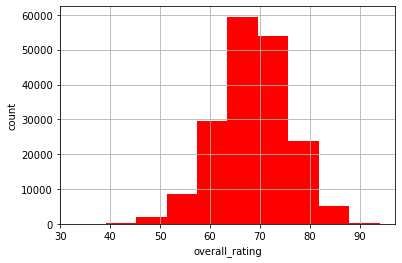

In [52]:
# modify this cell

def plot_histogram(df, X):
    ### BEGIN SOLUTION
    fig, ax = plt.subplots()
    
    ax.hist(df[X].dropna(), density=False, color='red')
    ax.set_xlabel(X)
    ax.set_ylabel('count')
    ax.grid(True)
    
    ### END SOLUTION
    

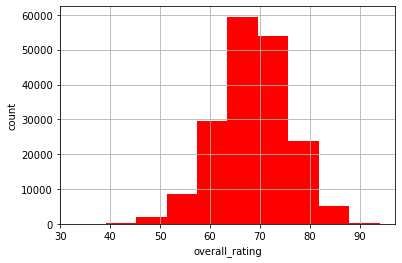

In [35]:
# DO NOT MODIFY

# your plot should look similar to the following:
plot_histogram(df, 'overall_rating')

Your solution for Exercise 2 should look like this:
![plot2.png](attachment:plot2.png)

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 3: Scatter Plot<br><br></p>

In the cell below, modify the function to plot...

In [46]:
# modify this cell

def plot_scatter(df, x, y):
    ### BEGIN SOLUTION
    
    fig, ax = plt.subplots()
    
    ax.scatter(df[x], df[y])
    ax.set_title('Scatter plot ' + x + ' vs ' + y, fontsize=14)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True)
    
    
    
    ### END SOLUTION

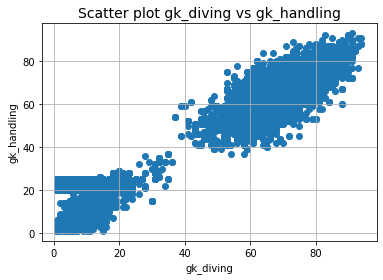

In [47]:
# DO NOT MODIFY

# your plot should look similar to the following:
plot_scatter(df, 'gk_diving', 'gk_handling')

Your solution to Excercise 3 should look like this:
![plot3.png](attachment:plot3.png)